In [1]:
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.preprocessing import StandardScaler

In [2]:
#!pip install gensim
#!pip install --upgrade numpy

In [5]:
import pandas as pd
data=pd.read_excel('coded_final_occup_adl.xlsx')
print(data.columns,data.shape)

Index(['Random ID', 'CRIS ID', 'Document ID', 'Domain ', 'Date ', 'Text',
       'Code', 'Self-harm', 'Suicide', 'Physical', 'Historic',
       'Dysfunctional social relationship', 'Notes',
       'Time taken to code (hours)'],
      dtype='object') (5630, 14)


In [6]:
df1=data[data['Domain ']==4]
print(df1.shape)

(3580, 14)


In [7]:
df1['sentence_count'] = df1['Text'].str.split('.').str.len()

/tmp/ipykernel_1221569/2131963520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sentence_count'] = df1['Text'].str.split('.').str.len()


In [8]:
df1['word_count'] = df1['Text'].str.split( ).str.len()

/tmp/ipykernel_1221569/438404407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['word_count'] = df1['Text'].str.split( ).str.len()


In [9]:
display(df1.head(10))

,Random ID,CRIS ID,Document ID,Domain,Date,Text,Code,Self-harm,Suicide,Physical,Historic,Dysfunctional social relationship,Notes,Time taken to code (hours),sentence_count,word_count
0,0.045905,10138952.0,20441341_Comments_Event,4,2009-07-06 00:00:00,Difficulty getting wife to UK as he is not abl...,0,1,0,0,NaN,NaN,NaN,2,1,14
2,0.045905,10138952.0,20441341_Comments_Event,4,2009-07-06 00:00:00,Currently receiving Income Support - Financial...,0,1,0,0,NaN,NaN,NaN,NaN,1,8
3,0.045905,10138952.0,20441382_Personal_History_History,4,2009-07-09 00:00:00,Difficulty getting wife to UK as he is not abl...,0,0,0,0,NaN,NaN,NaN,NaN,1,14
5,0.045905,10138952.0,20441382_Personal_History_History,4,2009-07-09 00:00:00,Currently receiving Income Support - Financial...,0,0,0,0,NaN,NaN,NaN,NaN,1,8
8,0.045905,10138952.0,25350604_Comments_Event,4,2010-05-06 00:00:00,"His flat looked very empty. no chairs, no bed ...",0,0,0,0,NaN,NaN,NaN,NaN,3,14
9,0.045905,10138952.0,25350604_Comments_Event,4,2010-05-06 00:00:00,He appeared casually but neatly dressed.,1,0,0,0,NaN,NaN,NaN,NaN,2,6
12,0.045905,10138952.0,25359711_Comments_Event,4,2010-05-07 00:00:00,45 QQQQQ old Iranian man well dressed and kempt.,1,1,0,0,NaN,NaN,NaN,NaN,2,9
15,0.045905,10138952.0,25827186221653_Attachment_Text_Attachment,4,2010-06-25 00:00:00,Concerns were raised about his ability to meet...,1,0,0,0,NaN,NaN,NaN,NaN,3,37
16,0.045905,10138952.0,25827216_Comments_Event,4,2010-06-25 00:00:00,Concerns were raised about his ability to meet...,1,0,0,0,NaN,NaN,NaN,NaN,3,37
17,0.045905,10138952.0,36094090_Comments_Event,4,2013-06-04 00:00:00,presented as casually dressed. He was unshaven...,0,0,0,0,NaN,NaN,NaN,NaN,3,14


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


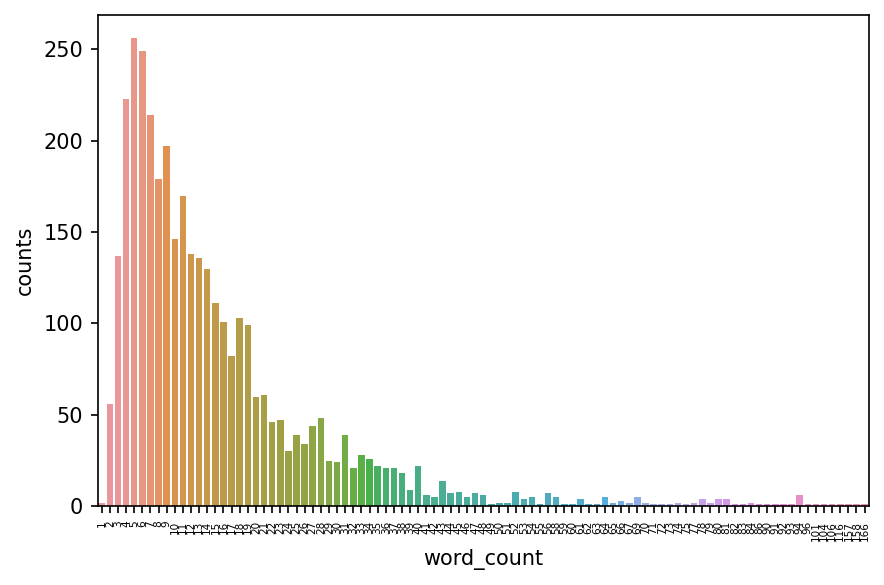

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
df_g = df1.groupby('word_count').count()['CRIS ID']
df_g = df_g.reset_index()
df_g['counts']=df_g['CRIS ID']

fig = plt.figure(dpi=150)
sns.barplot(df_g['word_count'],df_g['counts'])
plt.xticks(rotation=90,size=5)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


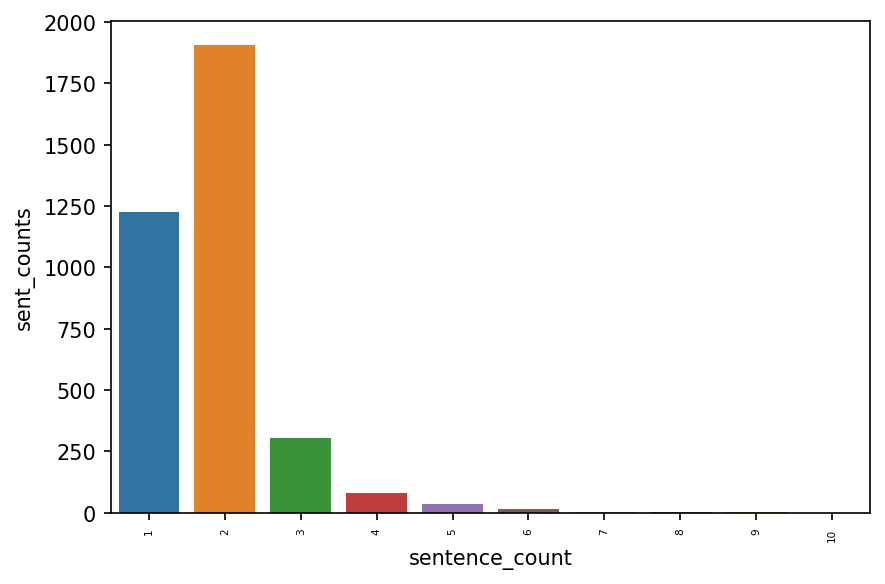

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
df_g = df1.groupby('sentence_count').count()['CRIS ID']
df_g = df_g.reset_index()
df_g['sent_counts']=df_g['CRIS ID']

fig = plt.figure(dpi=150)
sns.barplot(df_g['sentence_count'],df_g['sent_counts'])
plt.xticks(rotation=90,size=5)
plt.tight_layout()
plt.show()

In [48]:
# https://en.wikipedia.org/wiki/Apache_OpenNLP
#!pip install spacy


In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd

# Load NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Function to preprocess text
def preprocess_text(text):
    # Tokenize text into words
    words = word_tokenize(text.lower())
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join words back into a sentence
    preprocessed_text = ' '.join(words)
    return preprocessed_text

# Apply the function to the 'text' column and create a new column with preprocessed text
df1['preprocessed_text'] = df1['Text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/tmp/ipykernel_1221569/4113817265.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['preprocessed_text'] = df1['Text'].apply(preprocess_text)


In [25]:
import nltk
 
# Download the required NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
 
# Function to extract noun-verb pairs from text
def extract_verb_noun_pairs(text):
    noun_verb_pairs = []
    sentences = nltk.sent_tokenize(text)
    for sentence in sentences:
        words = nltk.word_tokenize(sentence)
        tags = nltk.pos_tag(words)
        for i in range(len(tags) - 1):
            if tags[i][1].startswith('V') and tags[i + 1][1].startswith('N'):
                noun_verb_pairs.append((tags[i][0], tags[i + 1][0]))
            elif tags[i][1].startswith('N') and tags[i + 1][1].startswith('V'):
                noun_verb_pairs.append((tags[i][0], tags[i + 1][0]))
            elif tags[i][1].startswith('R') and tags[i + 1][1].startswith('V'):
                noun_verb_pairs.append((tags[i][0], tags[i + 1][0]))
            elif tags[i][1].startswith('R') and tags[i + 1][1].startswith('N'):
                noun_verb_pairs.append((tags[i][0], tags[i + 1][0]))
            elif tags[i][1].startswith('V') and tags[i + 1][1].startswith('JJ'):
                noun_verb_pairs.append((tags[i][0], tags[i + 1][0]))
            elif tags[i][1].startswith('V') and tags[i + 1][0].lower() == 'as':
                noun_verb_pairs.append((tags[i][0], tags[i + 1][0]))
    return noun_verb_pairs
 
# Apply the function to the 'text' column and create a new column with noun-verb pairs
df1['verb_noun_pairs'] = df1['preprocessed_text'].apply(extract_verb_noun_pairs)


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
/tmp/ipykernel_1221569/1868927145.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['verb_noun_pairs'] = df1['preprocessed_text'].apply(extract_verb_noun_pairs)


In [26]:
# Print the dataframe
display(df1.head(10))

,Random ID,CRIS ID,Document ID,Domain,Date,Text,Code,Self-harm,Suicide,Physical,Historic,Dysfunctional social relationship,Notes,Time taken to code (hours),sentence_count,word_count,preprocessed_text,verb_noun_pairs,named_entity_pairs
0,0.045905,10138952.0,20441341_Comments_Event,4,2009-07-06 00:00:00,Difficulty getting wife to UK as he is not abl...,0,1,0,0,NaN,NaN,NaN,2,1,14,difficulty getting wife uk able support family...,"[(difficulty, getting), (getting, wife)]",[]
2,0.045905,10138952.0,20441341_Comments_Event,4,2009-07-06 00:00:00,Currently receiving Income Support - Financial...,0,1,0,0,NaN,NaN,NaN,NaN,1,8,currently receiving income support - financial...,"[(currently, receiving), (receiving, income), ...",[]
3,0.045905,10138952.0,20441382_Personal_History_History,4,2009-07-09 00:00:00,Difficulty getting wife to UK as he is not abl...,0,0,0,0,NaN,NaN,NaN,NaN,1,14,difficulty getting wife uk able support family...,"[(difficulty, getting), (getting, wife)]",[]
5,0.045905,10138952.0,20441382_Personal_History_History,4,2009-07-09 00:00:00,Currently receiving Income Support - Financial...,0,0,0,0,NaN,NaN,NaN,NaN,1,8,currently receiving income support - financial...,"[(currently, receiving), (receiving, income), ...",[]
8,0.045905,10138952.0,25350604_Comments_Event,4,2010-05-06 00:00:00,"His flat looked very empty. no chairs, no bed ...",0,0,0,0,NaN,NaN,NaN,NaN,3,14,"flat looked empty . chair , bed furniture natu...","[(looked, empty)]",[]
9,0.045905,10138952.0,25350604_Comments_Event,4,2010-05-06 00:00:00,He appeared casually but neatly dressed.,1,0,0,0,NaN,NaN,NaN,NaN,2,6,appeared casually neatly dressed .,"[(neatly, dressed)]",[]
12,0.045905,10138952.0,25359711_Comments_Event,4,2010-05-07 00:00:00,45 QQQQQ old Iranian man well dressed and kempt.,1,1,0,0,NaN,NaN,NaN,NaN,2,9,45 qqqqq old iranian man well dressed kempt .,[],[]
15,0.045905,10138952.0,25827186221653_Attachment_Text_Attachment,4,2010-06-25 00:00:00,Concerns were raised about his ability to meet...,1,0,0,0,NaN,NaN,NaN,NaN,3,37,concern raised ability meet need 14 year old s...,"[(concern, raised), (raised, ability), (meet, ...",[]
16,0.045905,10138952.0,25827216_Comments_Event,4,2010-06-25 00:00:00,Concerns were raised about his ability to meet...,1,0,0,0,NaN,NaN,NaN,NaN,3,37,concern raised ability meet need 14 year old s...,"[(concern, raised), (raised, ability), (meet, ...",[]
17,0.045905,10138952.0,36094090_Comments_Event,4,2013-06-04 00:00:00,presented as casually dressed. He was unshaven...,0,0,0,0,NaN,NaN,NaN,NaN,3,14,presented casually dressed . unshaven hair app...,"[(casually, dressed), (hair, appeared)]",[]


In [27]:
display(df1.tail(10))

,Random ID,CRIS ID,Document ID,Domain,Date,Text,Code,Self-harm,Suicide,Physical,Historic,Dysfunctional social relationship,Notes,Time taken to code (hours),sentence_count,word_count,preprocessed_text,verb_noun_pairs,named_entity_pairs
5606,0.004764,10020918.0,64892673_Comments_Event,4,2020-12-22 00:00:00,ZZZZZ prefers to manage his own medication and...,1,1,1,0,NaN,NaN,NaN,NaN,2,15,zzzzz prefers manage medication belief current...,"[(prefers, manage), (manage, medication)]",[]
5607,0.004764,10020918.0,64904034_Comments_Event,4,2020-12-23 00:00:00,he answered the phone promptly and reported be...,1,0,0,0,NaN,NaN,NaN,NaN,1,17,answered phone promptly reported bus making wa...,"[(answered, phone), (promptly, reported), (rep...",[]
5608,0.004764,10020918.0,66229783_Comments_Event,4,2021-04-14 00:00:00,"He was appropriately dresses,",1,0,0,0,NaN,NaN,NaN,NaN,1,4,"appropriately dress ,","[(appropriately, dress)]",[]
5609,0.004764,10020918.0,66794430_Comments_Event,4,2021-05-26 00:00:00,Had gone to shopping in Bromley and walked eac...,1,0,0,0,1.0,NaN,NaN,NaN,2,10,gone shopping bromley walked day .,"[(gone, shopping), (bromley, walked), (walked,...",[]
5610,0.004764,10020918.0,66957249_Comments_Event,4,2021-06-09 00:00:00,He was appropriately dresses for the weather,1,0,0,0,NaN,NaN,NaN,NaN,1,7,appropriately dress weather,"[(appropriately, dress)]",[]
5611,0.004764,10020918.0,67683487_Comments_Event,4,2021-08-05 00:00:00,He was appropriately dresses for the weather,1,0,0,0,NaN,NaN,NaN,NaN,1,7,appropriately dress weather,"[(appropriately, dress)]",[]
5614,0.004764,10020918.0,68190645_Comments_Event,4,2021-09-16 00:00:00,Appropriately dressed for the weather and well...,1,0,0,0,NaN,NaN,NaN,NaN,2,8,appropriately dressed weather well kempt .,"[(appropriately, dressed), (well, kempt)]",[]
5620,0.004764,10020918.0,68797470_Comments_Event,4,2021-11-03 00:00:00,He was appropriately dresses,1,0,0,0,NaN,NaN,NaN,NaN,1,4,appropriately dress,"[(appropriately, dress)]",[]
5628,0.004764,10020918.0,71054160_Comments_Event,4,2022-05-04 00:00:00,He was appropriately dresses for the weather,1,0,0,0,NaN,NaN,NaN,NaN,1,7,appropriately dress weather,"[(appropriately, dress)]",[]
5629,0.004764,10020918.0,71487445_Comments_Event,4,2022-06-07 00:00:00,He was appropriately dresses for the weather,1,0,0,0,NaN,NaN,NaN,NaN,1,7,appropriately dress weather,"[(appropriately, dress)]",[]


In [29]:
import spacy
import pandas as pd

# Load SpaCy NER model
nlp = spacy.load('en_core_web_sm')

# Function to extract named entity pairs from text
def extract_named_entity_pairs(text):
    pairs = []
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ in ['PERSON', 'ORG', 'GPE']:
            pairs.append((ent.text, ent.label_))
    return pairs

# Apply the function to the 'text' column and create a new column with named entity pairs
df1['named_entity_pairs'] = df1['preprocessed_text'].apply(extract_named_entity_pairs)

/tmp/ipykernel_1221569/1447899641.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['named_entity_pairs'] = df1['preprocessed_text'].apply(extract_named_entity_pairs)


In [30]:
display(df1.head(20))

,Random ID,CRIS ID,Document ID,Domain,Date,Text,Code,Self-harm,Suicide,Physical,Historic,Dysfunctional social relationship,Notes,Time taken to code (hours),sentence_count,word_count,preprocessed_text,verb_noun_pairs,named_entity_pairs
0,0.045905,10138952.0,20441341_Comments_Event,4,2009-07-06 00:00:00,Difficulty getting wife to UK as he is not abl...,0,1,0,0,NaN,NaN,NaN,2,1,14,difficulty getting wife uk able support family...,"[(difficulty, getting), (getting, wife)]",[]
2,0.045905,10138952.0,20441341_Comments_Event,4,2009-07-06 00:00:00,Currently receiving Income Support - Financial...,0,1,0,0,NaN,NaN,NaN,NaN,1,8,currently receiving income support - financial...,"[(currently, receiving), (receiving, income), ...",[]
3,0.045905,10138952.0,20441382_Personal_History_History,4,2009-07-09 00:00:00,Difficulty getting wife to UK as he is not abl...,0,0,0,0,NaN,NaN,NaN,NaN,1,14,difficulty getting wife uk able support family...,"[(difficulty, getting), (getting, wife)]",[]
5,0.045905,10138952.0,20441382_Personal_History_History,4,2009-07-09 00:00:00,Currently receiving Income Support - Financial...,0,0,0,0,NaN,NaN,NaN,NaN,1,8,currently receiving income support - financial...,"[(currently, receiving), (receiving, income), ...",[]
8,0.045905,10138952.0,25350604_Comments_Event,4,2010-05-06 00:00:00,"His flat looked very empty. no chairs, no bed ...",0,0,0,0,NaN,NaN,NaN,NaN,3,14,"flat looked empty . chair , bed furniture natu...","[(looked, empty)]",[]
9,0.045905,10138952.0,25350604_Comments_Event,4,2010-05-06 00:00:00,He appeared casually but neatly dressed.,1,0,0,0,NaN,NaN,NaN,NaN,2,6,appeared casually neatly dressed .,"[(neatly, dressed)]",[]
12,0.045905,10138952.0,25359711_Comments_Event,4,2010-05-07 00:00:00,45 QQQQQ old Iranian man well dressed and kempt.,1,1,0,0,NaN,NaN,NaN,NaN,2,9,45 qqqqq old iranian man well dressed kempt .,[],[]
15,0.045905,10138952.0,25827186221653_Attachment_Text_Attachment,4,2010-06-25 00:00:00,Concerns were raised about his ability to meet...,1,0,0,0,NaN,NaN,NaN,NaN,3,37,concern raised ability meet need 14 year old s...,"[(concern, raised), (raised, ability), (meet, ...",[]
16,0.045905,10138952.0,25827216_Comments_Event,4,2010-06-25 00:00:00,Concerns were raised about his ability to meet...,1,0,0,0,NaN,NaN,NaN,NaN,3,37,concern raised ability meet need 14 year old s...,"[(concern, raised), (raised, ability), (meet, ...",[]
17,0.045905,10138952.0,36094090_Comments_Event,4,2013-06-04 00:00:00,presented as casually dressed. He was unshaven...,0,0,0,0,NaN,NaN,NaN,NaN,3,14,presented casually dressed . unshaven hair app...,"[(casually, dressed), (hair, appeared)]",[]


In [31]:
display(df1.tail(2))

,Random ID,CRIS ID,Document ID,Domain,Date,Text,Code,Self-harm,Suicide,Physical,Historic,Dysfunctional social relationship,Notes,Time taken to code (hours),sentence_count,word_count,preprocessed_text,verb_noun_pairs,named_entity_pairs
5628,0.004764,10020918.0,71054160_Comments_Event,4,2022-05-04 00:00:00,He was appropriately dresses for the weather,1,0,0,0,NaN,NaN,NaN,NaN,1,7,appropriately dress weather,"[(appropriately, dress)]",[]
5629,0.004764,10020918.0,71487445_Comments_Event,4,2022-06-07 00:00:00,He was appropriately dresses for the weather,1,0,0,0,NaN,NaN,NaN,NaN,1,7,appropriately dress weather,"[(appropriately, dress)]",[]
